In [64]:
%run ../00_AdvancedPythonConcepts/talktools.py

## Anomaly/Novelty Detection

Sometimes we want to find outliers in our data -- either as candidates for cleaning or because novelties are what we are most interested in.  What would you do to find novelties? One possibility is to fit the data (potentially with "leave one out") you have with some parametric function and inspect those data that are farthest from your fit. You could assign a novelty score based on distance to the fit values.

We can also look to some ML techniques to create a non-parametric model of anomolies, potentially  There's not a lot of machinery for this in sklearn but there is some.

We'll look at *Isolation Forests* here as one technique.

See http://scikit-learn.org/stable/auto_examples/covariance/plot_outlier_detection.html#sphx-glr-auto-examples-covariance-plot-outlier-detection-py

<img src="http://image.slidesharecdn.com/gerster-papisconnect-anomaly-150521055051-lva1-app6891/95/anomaly-detection-with-bigml-4-638.jpg?cb=1432187570">
<img src="https://www.evernote.com/l/AUUwXmpu3nVNOpxwEo67YZD8VZwI950BtuMB/image.png">
Source: http://www.slideshare.net/DavidGerster1/anomaly-detection-with-bigml

In [13]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_digits
import numpy as np

In [8]:
digits = load_digits()
X = digits.data
y = digits.target

In [30]:
clf = IsolationForest(bootstrap=True,random_state=42)
clf.fit(X)

IsolationForest(bootstrap=True, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=42,
        verbose=0)

In [43]:
scores = clf.decision_function(X)
most_wierd = np.argsort(scores)

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

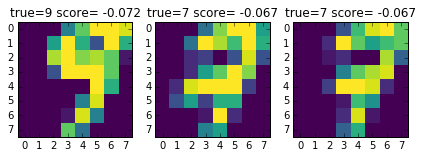

In [59]:
fig, axs = plt.subplots(1,3,figsize=(7,4))
for i,ind in enumerate(most_wierd[:3]):
    axs[i].imshow(X[ind].reshape(8,8),interpolation="nearest",cmap=plt.cm.viridis)
    axs[i].set_title("true={0:n} score= {1:0.3f}".format(y[ind],scores[ind]))

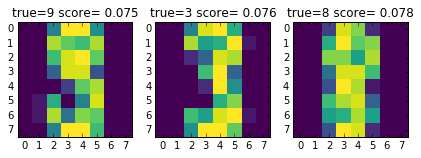

In [58]:
fig, axs = plt.subplots(1,3,figsize=(7,4))
for i,ind in enumerate(most_wierd[-3:]):
    axs[i].imshow(X[ind].reshape(8,8),interpolation="nearest",cmap=plt.cm.viridis)
    axs[i].set_title("true={0:n} score= {1:0.3f}".format(y[ind],scores[ind]))

In [63]:
from IPython.display import IFrame
IFrame('http://bigmacc.info', width="100%", height=600)